In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raw-imagesdata/efficientnetb0_kaggle_model.h5
/kaggle/input/raw-imagesdata/efficientnetb0_training_metrics.csv
/kaggle/input/raw-imagesdata/densenet201_training_metrics.csv
/kaggle/input/raw-imagesdata/notebookc019b1ee6f (1).ipynb
/kaggle/input/raw-imagesdata/resnet50_training_metrics.csv
/kaggle/input/raw-imagesdata/resnet50_kaggle_model.h5
/kaggle/input/raw-imagesdata/densenet201_kaggle_model.h5
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train_images/ef476be214d4.png
/kaggle/input/aptos2019-blindness-detection/train_images/6dcde47060f9.png
/kaggle/input/aptos2019-blindness-detection/train_images/ec363f48867b.png
/kaggle/input/aptos2019-blindness-detection/train_images/17f6c7072f61.png
/kaggle/input/aptos2019-blindness-detection/train_images/b49b2fac2514.png
/kaggle/input/aptos2019-blindness-detectio

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Parameters
HEIGHT, WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
STEPS_PER_EPOCH = 92

# Paths
BASE_PATH = "/kaggle/input/aptos2019-blindness-detection"
TRAIN_CSV = os.path.join(BASE_PATH, 'train.csv')
TEST_CSV = os.path.join(BASE_PATH, 'test.csv')
TRAIN_IMG_DIR = os.path.join(BASE_PATH, 'train_images')
TEST_IMG_DIR = os.path.join(BASE_PATH, 'test_images')

# Load Data
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

train_df['filename'] = train_df['id_code'] + '.png'
test_df['filename'] = test_df['id_code'] + '.png'
train_df['diagnosis'] = train_df['diagnosis'].astype(str)

# Train-validation split
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['diagnosis'], random_state=42)

# ImageDataGenerators
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_IMG_DIR,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=TRAIN_IMG_DIR,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)





Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [4]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Define parameters
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10
STEPS_PER_EPOCH = 92

# Kaggle input directory
BASE_PATH = '/kaggle/input/aptos2019-blindness-detection'
TRAIN_CSV = os.path.join(BASE_PATH, 'train.csv')
TEST_CSV = os.path.join(BASE_PATH, 'test.csv')
TRAIN_DIR = os.path.join(BASE_PATH, 'train_images')
TEST_DIR = os.path.join(BASE_PATH, 'test_images')

# Load CSVs
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

# Add filename column
train_df['filename'] = train_df['id_code'].apply(lambda x: x + '.png')
test_df['filename'] = test_df['id_code'].apply(lambda x: x + '.png')
train_df['diagnosis'] = train_df['diagnosis'].astype(str)

# Split into training and validation
train_split_df, val_split_df = train_test_split(train_df, test_size=0.2, stratify=train_df['diagnosis'], random_state=42)

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_split_df,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_split_df,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=TEST_DIR,
    x_col="filename",
    target_size=(HEIGHT, WIDTH),
    batch_size=1,
    shuffle=False,
    class_mode=None
)

# Build EfficientNetB0 Model
def build_model(num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = True
    return model

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Define metrics
metrics = [
    tf.keras.metrics.AUC(name='AUC'),
    tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),
    tf.keras.metrics.TruePositives(name='TruePositives'),
    tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
    tf.keras.metrics.FalsePositives(name='FalsePositives'),
    tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
    F1Score(name='F1Score')
]

# Build and compile the model
num_classes = len(train_generator.class_indices)
model = build_model(num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=metrics)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=callbacks
)

# Save model
model.save("efficientnetb0_kaggle_model.h5")

# Save training metrics to CSV
metrics_df = pd.DataFrame(history.history)
metrics_df.to_csv("efficientnetb0_training_metrics.csv", index=False)


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.
Found 1928 validated image filenames.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - AUC: 0.8969 - Accuracy: 0.6774 - F1Score: 0.6473 - FalseNegatives: 588.0753 - FalsePositives: 245.3441 - Precision: 0.7669 - Recall: 0.5633 - TrueNegatives: 5750.5698 - TruePositives: 910.9032 - loss: 0.8922 - val_AUC: 0.7304 - val_Accuracy: 0.4925 - val_F1Score: 0.4925 - val_FalseNegatives: 372.0000 - val_FalsePositives: 372.0000 - val_Precision: 0.4925 - val_Recall: 0.4925 - val_TrueNegatives: 2560.0000 - val_TruePositives: 361.0000 - val_loss: 1.8423 - learning_rate: 0.0010
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 725ms/step - AUC: 0.0000e+00 - Accuracy: 0.0000e+00 - F1Score: 0.0000e+00 - FalseNegatives: 0.0000e+00 - FalsePositives: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - TrueNegatives: 0.0000e+00 - TruePositives: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.7304 - val_Accuracy: 0.4925 - val_F1Score: 0.4925 - val_FalseNegatives: 372.0000 - val_FalsePositives: 372.0000 - val_Precision: 0.4925 - val_Recall: 0.4925 - val_TrueNegatives: 2560.0000 - val_TruePositives: 361.0000 - val_loss: 1.8423 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - AUC: 0.9557 - Accuracy: 0.7876 - F1Score: 0.7777 - FalseNegatives: 392.0435 - FalsePositives: 213.8696 - Precision: 0.8313 - Recall: 0.7306 - TrueNegatives: 5693.1304 - TruePositives: 1084.7065 - loss: 0.6064
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
92/92 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - AUC: 0.9558 - Accuracy: 0.7876 - F1Score: 0.7777 - FalseNegative

<ipython-input-6-d7e90b5a0dff>:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
<ipython-input-6-d7e90b5a0dff>:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
<ipython-input-6-d7e90b5a0dff>:45: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current 

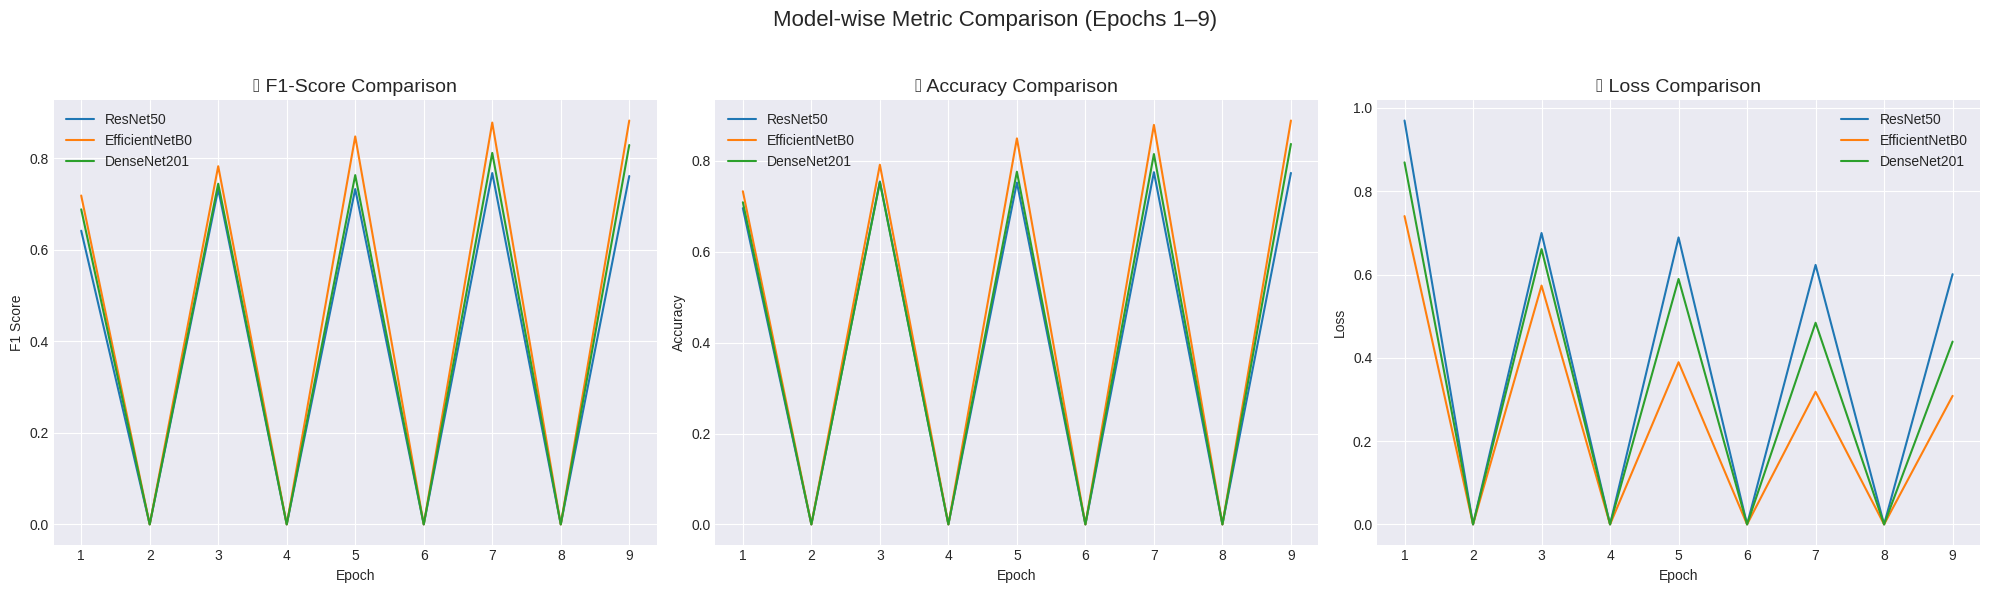

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from CSV files
resnet_df = pd.read_csv('/kaggle/input/raw-imagesdata/resnet50_training_metrics.csv')
efficientnet_df = pd.read_csv('/kaggle/input/raw-imagesdata/efficientnetb0_training_metrics.csv')
densenet_df = pd.read_csv('/kaggle/input/raw-imagesdata/densenet201_training_metrics.csv')

# Add epoch column if not present
if 'epoch' not in resnet_df.columns:
    resnet_df['epoch'] = range(1, len(resnet_df) + 1)
    efficientnet_df['epoch'] = range(1, len(efficientnet_df) + 1)
    densenet_df['epoch'] = range(1, len(densenet_df) + 1)

# Limit to first 9 epochs
resnet_df = resnet_df[resnet_df['epoch'] <= 9]
efficientnet_df = efficientnet_df[efficientnet_df['epoch'] <= 9]
densenet_df = densenet_df[densenet_df['epoch'] <= 9]

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')  # Updated seaborn style to avoid warning
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define metrics and titles
metrics = ['F1Score', 'Accuracy', 'loss']
titles = ['📊 F1-Score Comparison', '📈 Accuracy Comparison', '📉 Loss Comparison']
ylabels = ['F1 Score', 'Accuracy', 'Loss']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(resnet_df['epoch'], resnet_df[metric], label='ResNet50', color=colors[0])
    ax.plot(efficientnet_df['epoch'], efficientnet_df[metric], label='EfficientNetB0', color=colors[1])
    ax.plot(densenet_df['epoch'], densenet_df[metric], label='DenseNet201', color=colors[2])
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(range(1, 10))
    ax.legend()
    ax.grid(True)

# Final layout
plt.suptitle('Model-wise Metric Comparison (Epochs 1–9)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


KeyError: 'None of [RangeIndex(start=0, stop=10, step=1)] are in the [columns]'

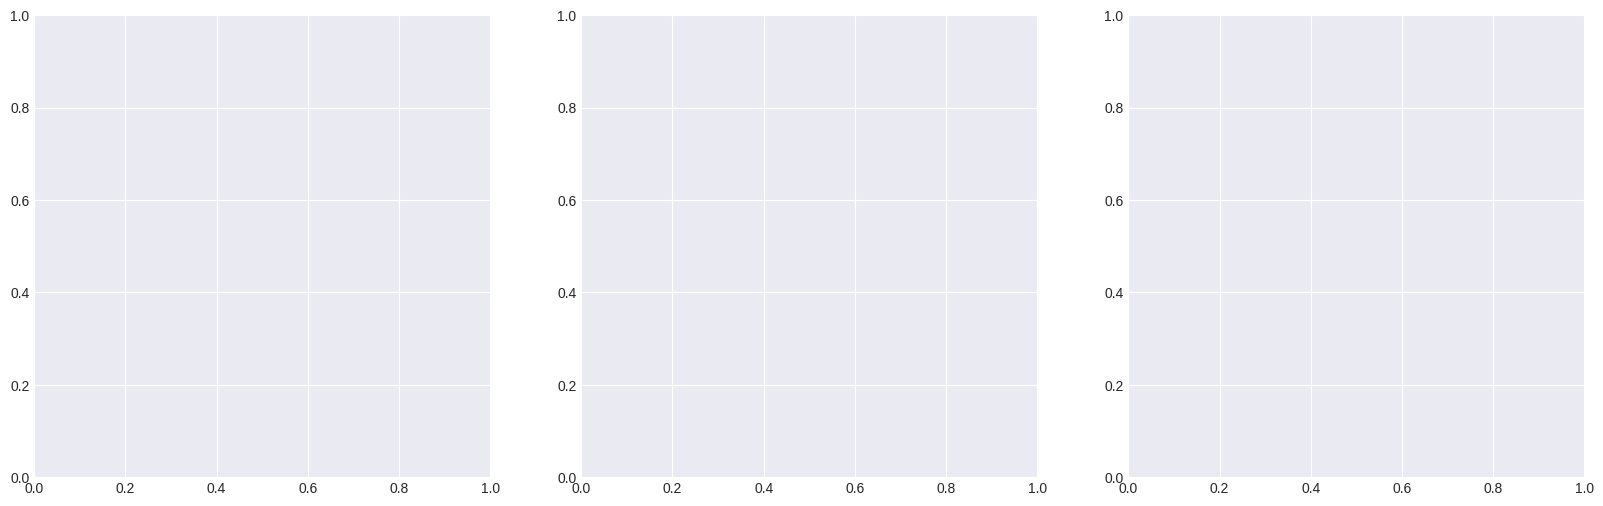

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
resnet_path = '/kaggle/input/raw-imagesdata/resnet50_training_metrics.csv'
densenet_path = '/kaggle/input/raw-imagesdata/densenet201_training_metrics.csv'
efficientnet_path = '/kaggle/input/raw-imagesdata/efficientnetb0_training_metrics.csv'

# Load CSVs
resnet_df = pd.read_csv(resnet_path)
densenet_df = pd.read_csv(densenet_path)
efficientnet_df = pd.read_csv(efficientnet_path)

# Identify epoch column
def get_epoch_column(df):
    for col in df.columns:
        if 'epoch' in col.lower():
            return col
    return df.index

epoch_col_resnet = get_epoch_column(resnet_df)
epoch_col_densenet = get_epoch_column(densenet_df)
epoch_col_efficientnet = get_epoch_column(efficientnet_df)

# Filter out invalid rows
resnet_df = resnet_df[resnet_df['F1Score'] > 0]
densenet_df = densenet_df[densenet_df['F1Score'] > 0]
efficientnet_df = efficientnet_df[efficientnet_df['F1Score'] > 0]

# Plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot F1-Score
axes[0].plot(resnet_df[epoch_col_resnet], resnet_df['F1Score'], label='ResNet50 Train', color='blue')
axes[0].plot(resnet_df[epoch_col_resnet], resnet_df['val_F1Score'], '--', label='ResNet50 Val', color='blue')

axes[0].plot(densenet_df[epoch_col_densenet], densenet_df['F1Score'], label='DenseNet201 Train', color='green')
axes[0].plot(densenet_df[epoch_col_densenet], densenet_df['val_F1Score'], '--', label='DenseNet201 Val', color='green')

axes[0].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['F1Score'], label='EfficientNetB0 Train', color='purple')
axes[0].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['val_F1Score'], '--', label='EfficientNetB0 Val', color='purple')

axes[0].set_title("F1 Score")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("F1 Score")
axes[0].legend()

# Plot Accuracy
axes[1].plot(resnet_df[epoch_col_resnet], resnet_df['Accuracy'], label='ResNet50 Train', color='blue')
axes[1].plot(resnet_df[epoch_col_resnet], resnet_df['val_Accuracy'], '--', label='ResNet50 Val', color='blue')

axes[1].plot(densenet_df[epoch_col_densenet], densenet_df['Accuracy'], label='DenseNet201 Train', color='green')
axes[1].plot(densenet_df[epoch_col_densenet], densenet_df['val_Accuracy'], '--', label='DenseNet201 Val', color='green')

axes[1].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['Accuracy'], label='EfficientNetB0 Train', color='purple')
axes[1].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['val_Accuracy'], '--', label='EfficientNetB0 Val', color='purple')

axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

# Plot Loss
axes[2].plot(resnet_df[epoch_col_resnet], resnet_df['loss'], label='ResNet50 Train', color='blue')
axes[2].plot(resnet_df[epoch_col_resnet], resnet_df['val_loss'], '--', label='ResNet50 Val', color='blue')

axes[2].plot(densenet_df[epoch_col_densenet], densenet_df['loss'], label='DenseNet201 Train', color='green')
axes[2].plot(densenet_df[epoch_col_densenet], densenet_df['val_loss'], '--', label='DenseNet201 Val', color='green')

axes[2].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['loss'], label='EfficientNetB0 Train', color='purple')
axes[2].plot(efficientnet_df[epoch_col_efficientnet], efficientnet_df['val_loss'], '--', label='EfficientNetB0 Val', color='purple')

axes[2].set_title("Loss")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss")
axes[2].legend()

# Final touches
plt.suptitle("Metric-wise Comparison: F1 Score, Accuracy, and Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-5-6059054a9811>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-5-6059054a9811>:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


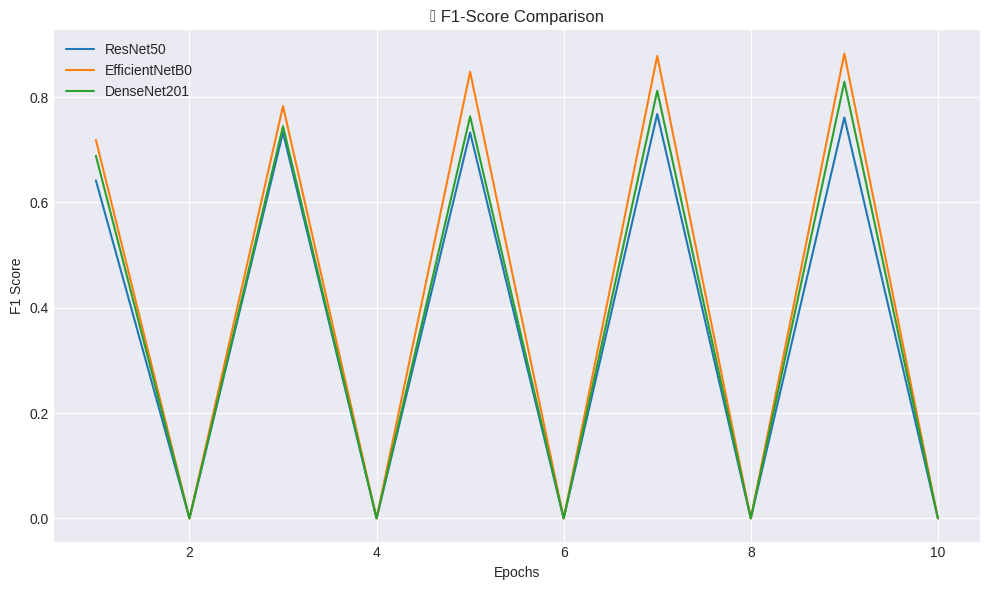

<ipython-input-5-6059054a9811>:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


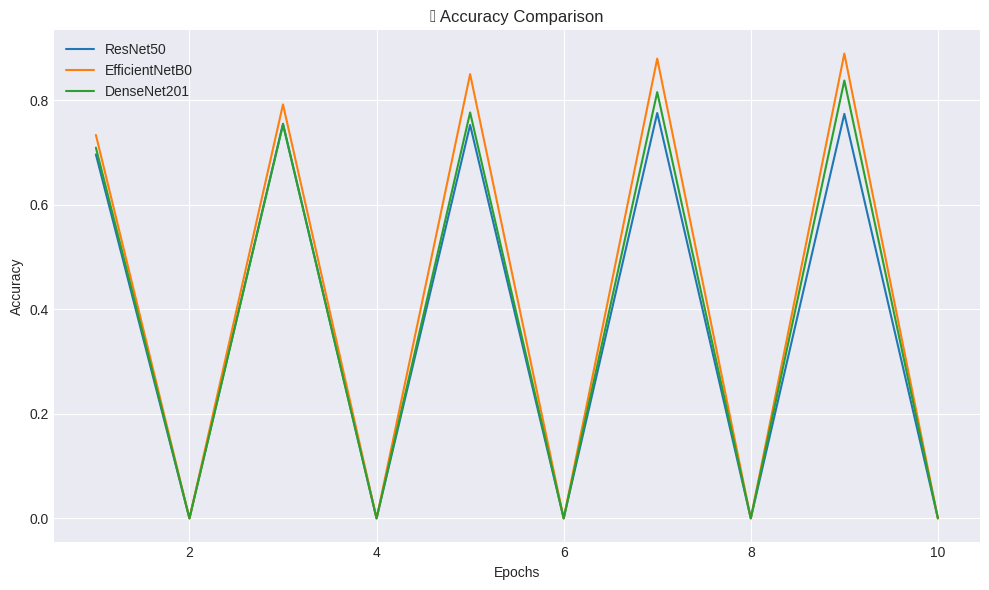

<ipython-input-5-6059054a9811>:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


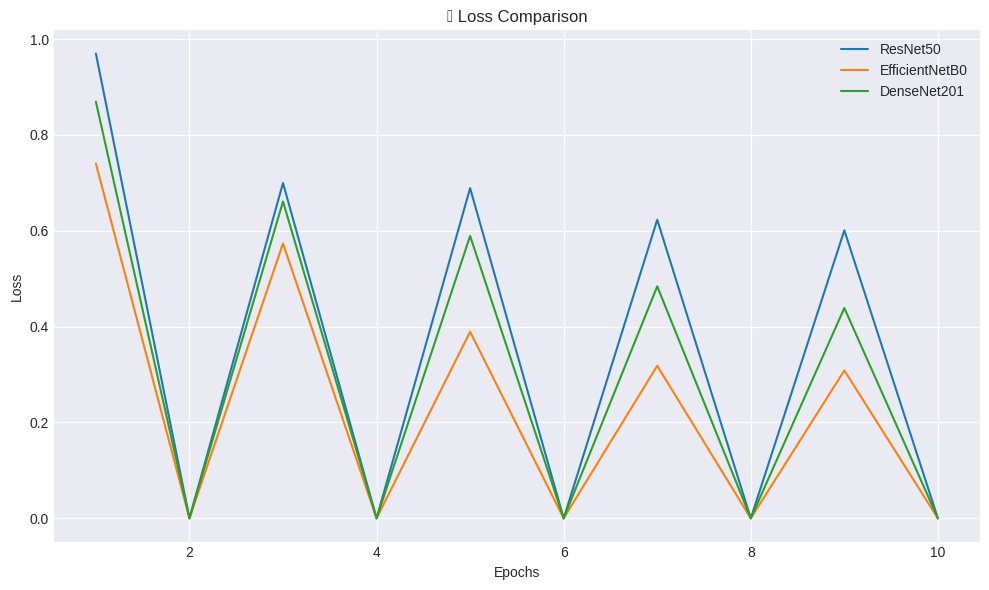

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from CSV files
resnet_df = pd.read_csv('/kaggle/working/resnet50_training_metrics.csv')
efficientnet_df = pd.read_csv('/kaggle/working/efficientnetb0_training_metrics.csv')
densenet_df = pd.read_csv('/kaggle/working/densenet201_training_metrics.csv')

# Optional: Add epoch column if not present
if 'epoch' not in resnet_df.columns:
    resnet_df['epoch'] = range(1, len(resnet_df) + 1)
    efficientnet_df['epoch'] = range(1, len(efficientnet_df) + 1)
    densenet_df['epoch'] = range(1, len(densenet_df) + 1)

# Set plot style
plt.style.use('seaborn-darkgrid')

# Plot comparison function
def plot_metric_comparison(metric_name, title=None, ylabel=None):
    plt.figure(figsize=(10, 6))
    plt.plot(resnet_df['epoch'], resnet_df[metric_name], label='ResNet50')
    plt.plot(efficientnet_df['epoch'], efficientnet_df[metric_name], label='EfficientNetB0')
    plt.plot(densenet_df['epoch'], densenet_df[metric_name], label='DenseNet201')
    plt.xlabel('Epochs')
    plt.ylabel(ylabel or metric_name)
    plt.title(title or f'{metric_name} Comparison Across Models')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting
plot_metric_comparison('F1Score', title='📊 F1-Score Comparison', ylabel='F1 Score')
plot_metric_comparison('Accuracy', title='📈 Accuracy Comparison', ylabel='Accuracy')
plot_metric_comparison('loss', title='📉 Loss Comparison', ylabel='Loss')


Hybrid

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load models with correct file paths
resnet_model = tf.keras.models.load_model('/kaggle/working/resnet50_kaggle_model.h5', compile=False)
densenet_model = tf.keras.models.load_model('/kaggle/working/densenet201_kaggle_model.h5', compile=False)
efficientnet_model = tf.keras.models.load_model('/kaggle/working/efficientnetb0_kaggle_model.h5', compile=False)

# Define parameters
BATCH_SIZE = 32
HEIGHT = 320
WIDTH = 320

# Load and process the training data
train_df = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
train_df['id_code'] = train_df['id_code'].astype(str) + '.png'
train_df['diagnosis'] = train_df['diagnosis'].astype(str)

# Split into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['diagnosis'], random_state=42)

# Set the image directory path
img_dir = '/kaggle/input/aptos2019-blindness-detection/train_images'

# ImageDataGenerators for each model with respective input sizes
train_generator_resnet = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col="id_code",
    y_col="diagnosis",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    target_size=(324, 324),  # Corrected input size
    shuffle=False
)


train_generator_densenet = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col="id_code",
    y_col="diagnosis",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    target_size=(224, 224),
    shuffle=False
)

train_generator_efficientnet = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col="id_code",
    y_col="diagnosis",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    target_size=(224, 224),
    shuffle=False
)

# Feature extraction function
def extract_features(model, generator):
    steps = len(generator)
    features = model.predict(generator, steps=steps, verbose=1)
    return features

# Extract features from each model
resnet_features = extract_features(resnet_model, train_generator_resnet)
densenet_features = extract_features(densenet_model, train_generator_densenet)
efficientnet_features = extract_features(efficientnet_model, train_generator_efficientnet)

# Flatten features
resnet_features = resnet_features.reshape(resnet_features.shape[0], -1)
densenet_features = densenet_features.reshape(densenet_features.shape[0], -1)
efficientnet_features = efficientnet_features.reshape(efficientnet_features.shape[0], -1)

# Combine features into one array
combined_features = np.concatenate([resnet_features, densenet_features, efficientnet_features], axis=1)
labels = train_generator_resnet.classes

# Split combined features for training and validation
X_train, X_val, y_train, y_val = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Train SVM on PCA-reduced features
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train)

# Evaluate the model
val_preds = svm_model.predict(X_val_pca)
acc = accuracy_score(y_val, val_preds)
print(f"SVM Validation Accuracy: {acc:.4f}")


Found 2929 validated image filenames belonging to 5 classes.
Found 2929 validated image filenames belonging to 5 classes.
Found 2929 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step
SVM Validation Accuracy: 0.8601



Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9895    0.9947       286
           1     0.7381    0.5849    0.6526        53
           2     0.7512    0.9412    0.8355       170
           3     0.0000    0.0000    0.0000        29
           4     0.6250    0.6250    0.6250        48

    accuracy                         0.8601       586
   macro avg     0.6229    0.6281    0.6216       586
weighted avg     0.8239    0.8601    0.8381       586



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


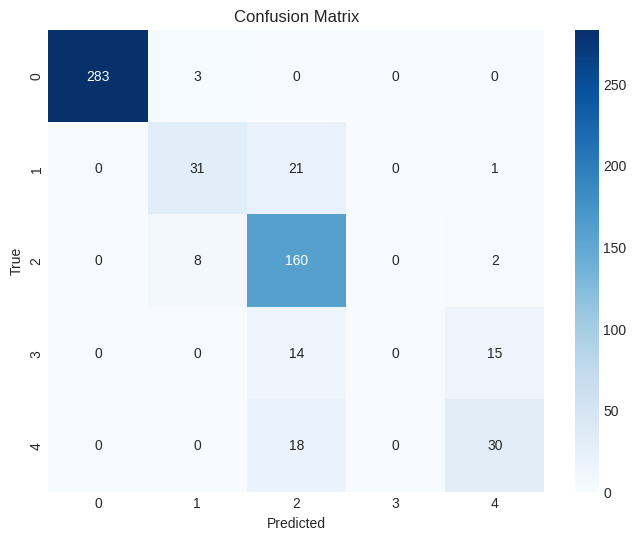

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, val_preds, digits=4))

# Confusion matrix
cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Sample Image Path: /kaggle/input/aptos2019-blindness-detection/train_images/bb11db08584a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


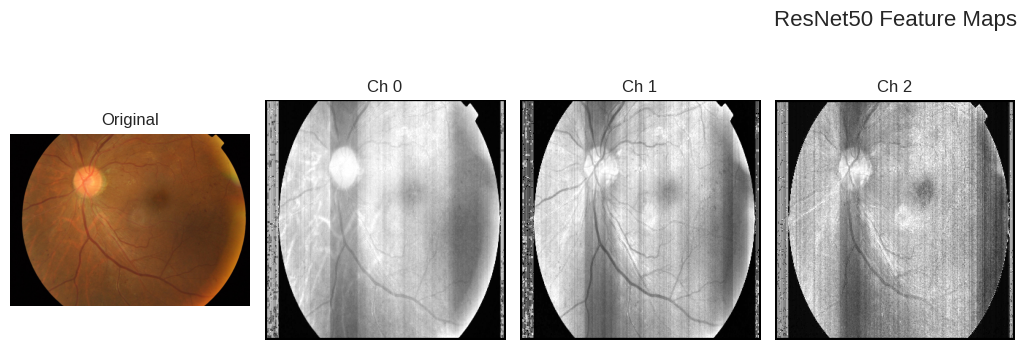

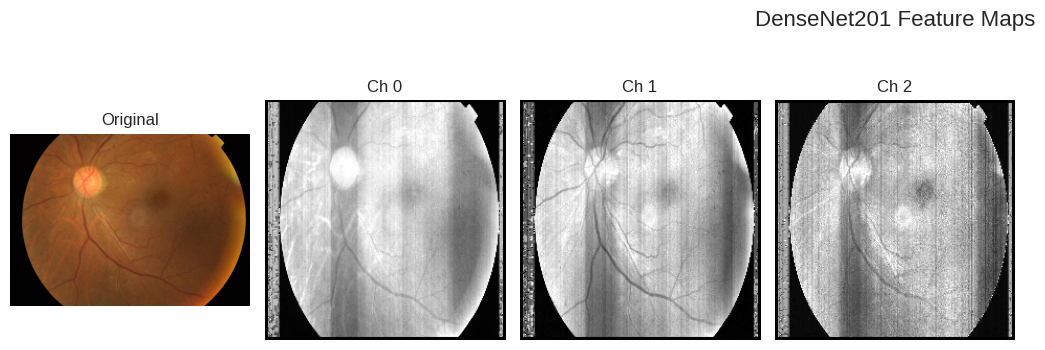

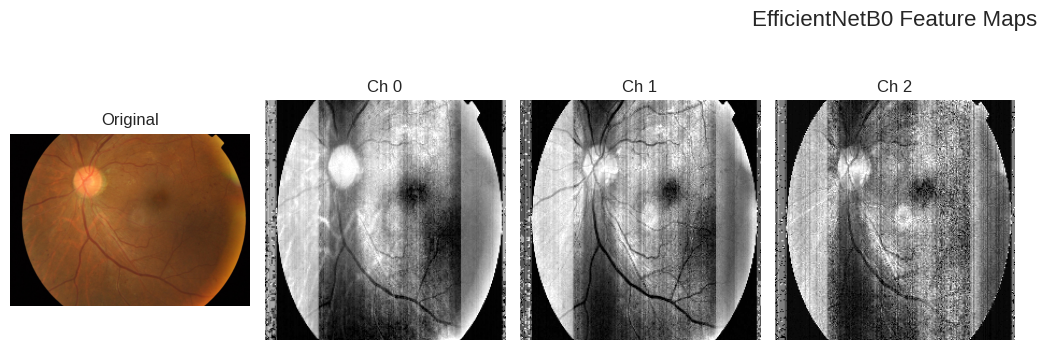

In [16]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load models
resnet_model = tf.keras.models.load_model('/kaggle/working/resnet50_kaggle_model.h5', compile=False)
efficientnet_model = tf.keras.models.load_model('/kaggle/working/efficientnetb0_kaggle_model.h5', compile=False)
densenet_model = tf.keras.models.load_model('/kaggle/working/densenet201_kaggle_model.h5', compile=False)

# Set image directory and choose a random image
img_dir = '/kaggle/input/aptos2019-blindness-detection/train_images'
img_list = [f for f in os.listdir(img_dir) if f.endswith('.png')]
sample_img_name = random.choice(img_list)
sample_img_path = os.path.join(img_dir, sample_img_name)

print("Sample Image Path:", sample_img_path)

# Function to preprocess image for a given model input size
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    return np.expand_dims(img_array, axis=0)

# Feature map plotting function
def plot_feature_map_with_original(img_path, feature_map, model_name, n_channels=6):
    # Load and show original image
    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    feature_map = feature_map[0]  # Remove batch dim
    h, w, c = feature_map.shape
    scaler = MinMaxScaler()

    plt.figure(figsize=(18, 4))

    # Plot original image
    plt.subplot(1, n_channels + 1, 1)
    plt.imshow(orig_img)
    plt.axis('off')
    plt.title("Original")

    # Plot first few feature map channels
    for i in range(n_channels):
        if i >= c:
            break
        feature = feature_map[:, :, i]
        feature = scaler.fit_transform(feature)
        plt.subplot(1, n_channels + 1, i + 2)
        plt.imshow(feature, cmap='gray')
        plt.axis('off')
        plt.title(f'Ch {i}')

    plt.suptitle(f"{model_name} Feature Maps", fontsize=16)
    plt.tight_layout()
    plt.show()

# Process and extract feature maps for each model
# For visualization, use the first conv layer output (or first few layers)
feature_extractor_resnet = tf.keras.Model(inputs=resnet_model.input, outputs=resnet_model.layers[1].output)
feature_extractor_densenet = tf.keras.Model(inputs=densenet_model.input, outputs=densenet_model.layers[1].output)
feature_extractor_efficientnet = tf.keras.Model(inputs=efficientnet_model.input, outputs=efficientnet_model.layers[1].output)

# Preprocess image for each model and extract features
img_resnet = preprocess_image(sample_img_path, target_size=(324, 324))
img_densenet = preprocess_image(sample_img_path, target_size=(224, 224))
img_efficientnet = preprocess_image(sample_img_path, target_size=(224, 224))

resnet_feature_map = feature_extractor_resnet.predict(img_resnet)
densenet_feature_map = feature_extractor_densenet.predict(img_densenet)
efficientnet_feature_map = feature_extractor_efficientnet.predict(img_efficientnet)

# Plot feature maps alongside original image
plot_feature_map_with_original(sample_img_path, resnet_feature_map, "ResNet50", n_channels=6)
plot_feature_map_with_original(sample_img_path, densenet_feature_map, "DenseNet201", n_channels=6)
plot_feature_map_with_original(sample_img_path, efficientnet_feature_map, "EfficientNetB0", n_channels=6)


Sample Image Path: /kaggle/input/aptos2019-blindness-detection/train_images/107aea0d9289.png


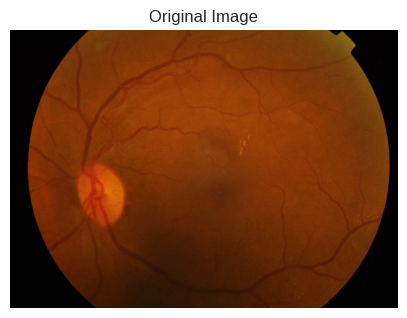

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


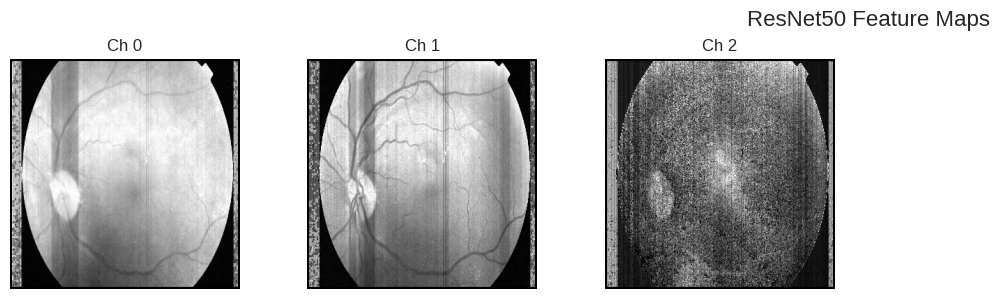

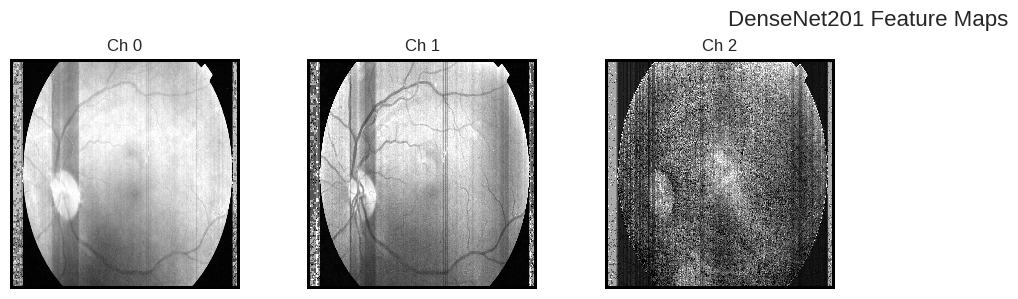

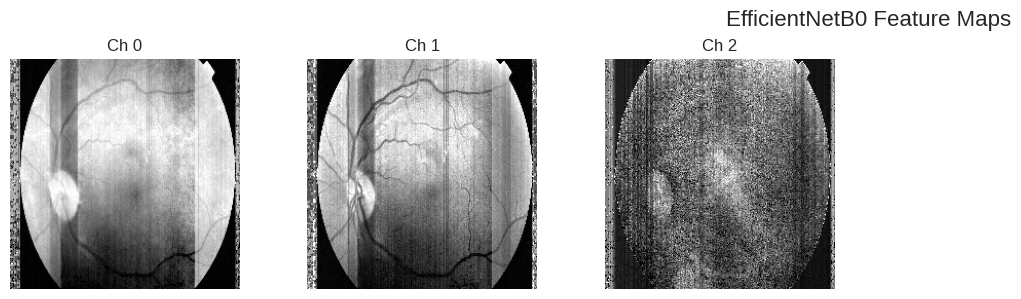

In [17]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load models
resnet_model = tf.keras.models.load_model('/kaggle/working/resnet50_kaggle_model.h5', compile=False)
efficientnet_model = tf.keras.models.load_model('/kaggle/working/efficientnetb0_kaggle_model.h5', compile=False)
densenet_model = tf.keras.models.load_model('/kaggle/working/densenet201_kaggle_model.h5', compile=False)

# Set image directory and choose a random image
img_dir = '/kaggle/input/aptos2019-blindness-detection/train_images'
img_list = [f for f in os.listdir(img_dir) if f.endswith('.png')]
sample_img_name = random.choice(img_list)
sample_img_path = os.path.join(img_dir, sample_img_name)

print("Sample Image Path:", sample_img_path)

# Function to preprocess image for a given model input size
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    return np.expand_dims(img_array, axis=0)

# Feature map plotting function without original image
def plot_feature_map(feature_map, model_name, n_channels=6):
    feature_map = feature_map[0]
    h, w, c = feature_map.shape
    scaler = MinMaxScaler()

    plt.figure(figsize=(18, 3))
    for i in range(n_channels):
        if i >= c:
            break
        feature = feature_map[:, :, i]
        feature = scaler.fit_transform(feature)
        plt.subplot(1, n_channels, i + 1)
        plt.imshow(feature, cmap='gray')
        plt.axis('off')
        plt.title(f'Ch {i}')
    plt.suptitle(f"{model_name} Feature Maps", fontsize=16)
    plt.tight_layout()
    plt.show()

# Show original image
orig_img = cv2.imread(sample_img_path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(orig_img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Define feature extractors for early layers
feature_extractor_resnet = tf.keras.Model(inputs=resnet_model.input, outputs=resnet_model.layers[1].output)
feature_extractor_densenet = tf.keras.Model(inputs=densenet_model.input, outputs=densenet_model.layers[1].output)
feature_extractor_efficientnet = tf.keras.Model(inputs=efficientnet_model.input, outputs=efficientnet_model.layers[1].output)

# Preprocess image for each model
img_resnet = preprocess_image(sample_img_path, target_size=(324, 324))
img_densenet = preprocess_image(sample_img_path, target_size=(224, 224))
img_efficientnet = preprocess_image(sample_img_path, target_size=(224, 224))

# Generate feature maps
resnet_feature_map = feature_extractor_resnet.predict(img_resnet)
densenet_feature_map = feature_extractor_densenet.predict(img_densenet)
efficientnet_feature_map = feature_extractor_efficientnet.predict(img_efficientnet)

# Plot feature maps for each model
plot_feature_map(resnet_feature_map, "ResNet50", n_channels=6)
plot_feature_map(densenet_feature_map, "DenseNet201", n_channels=6)
plot_feature_map(efficientnet_feature_map, "EfficientNetB0", n_channels=6)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


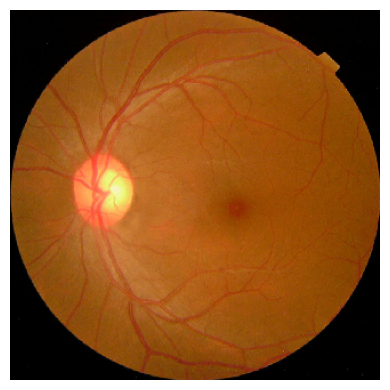

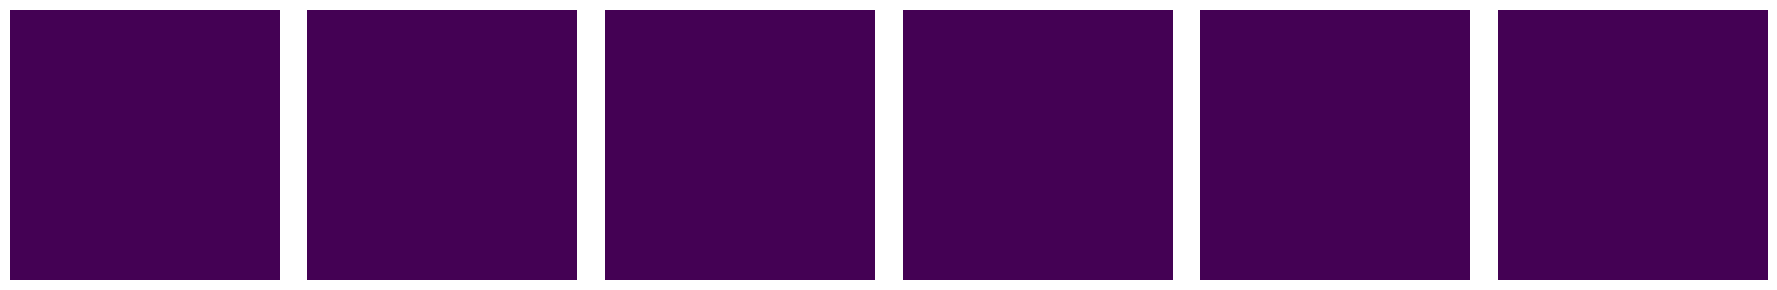

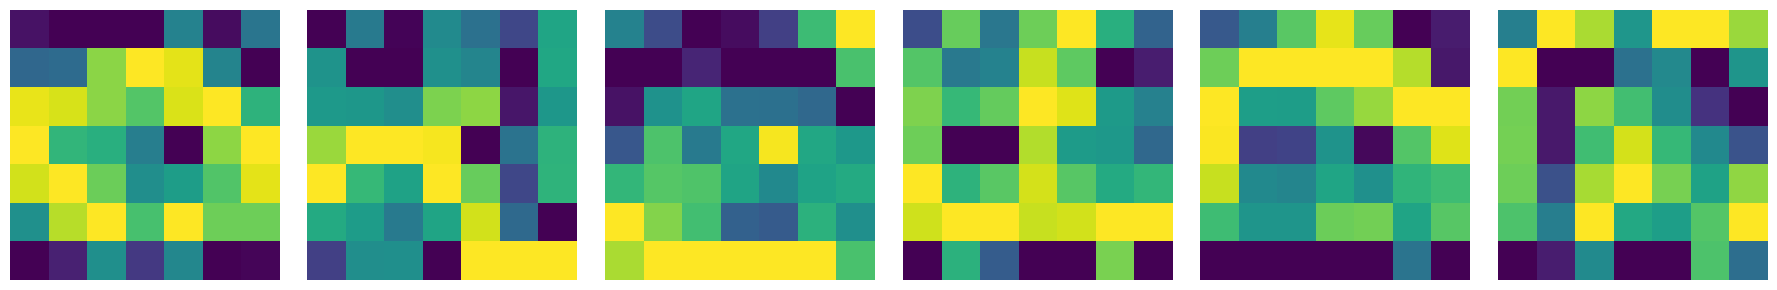

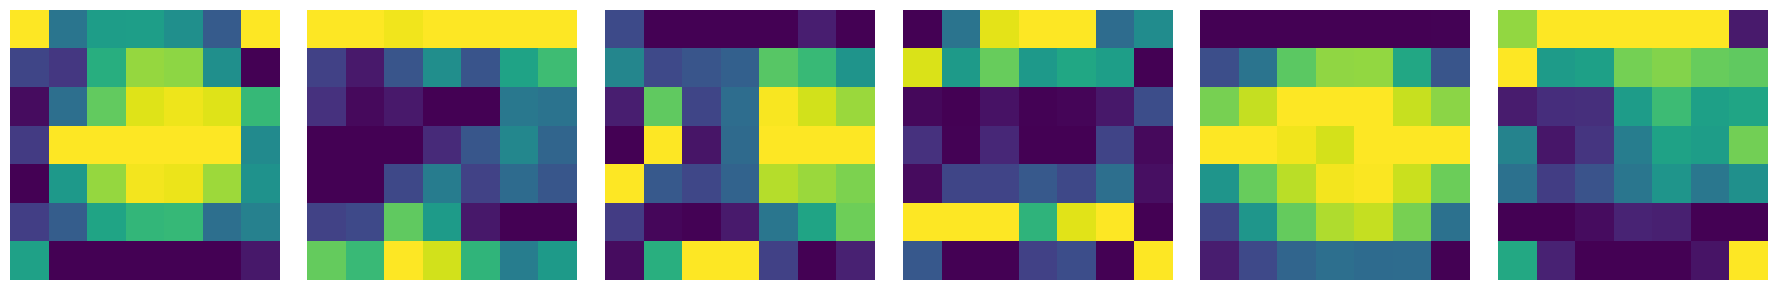

In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load models
resnet_model = tf.keras.models.load_model('/kaggle/working/resnet50_kaggle_model.h5', compile=False)
densenet_model = tf.keras.models.load_model('/kaggle/working/densenet201_kaggle_model.h5', compile=False)
efficientnet_model = tf.keras.models.load_model('/kaggle/working/efficientnetb0_kaggle_model.h5', compile=False)

# Image directory and random sample
img_dir = '/kaggle/input/aptos2019-blindness-detection/train_images'
img_list = os.listdir(img_dir)
sample_img_path = os.path.join(img_dir, random.choice(img_list))

# Load and preprocess image for each model
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0), img

img_resnet, original_img = preprocess_image(sample_img_path, (324, 324))
img_densenet, _ = preprocess_image(sample_img_path, (224, 224))
img_efficientnet, _ = preprocess_image(sample_img_path, (224, 224))

# Get last convolutional layer names (these may vary based on model saving/loading)
def get_conv_layer_output(model, input_tensor, layer_name):
    intermediate_model = tf.keras.Model(inputs=model.input,
                                        outputs=model.get_layer(layer_name).output)
    return intermediate_model.predict(input_tensor)

# You may need to inspect model.summary() to adjust these if you changed layers
resnet_conv_output = get_conv_layer_output(resnet_model, img_resnet, 'conv5_block3_out')  # example for ResNet50
densenet_conv_output = get_conv_layer_output(densenet_model, img_densenet, 'conv5_block32_concat')  # example for DenseNet201
efficientnet_conv_output = get_conv_layer_output(efficientnet_model, img_efficientnet, 'top_activation')  # example for EfficientNetB0

# Function to plot feature maps (clean version)
def plot_feature_map(feature_map, n_channels=6, cmap='viridis'):
    feature_map = feature_map[0]
    h, w, c = feature_map.shape
    scaler = MinMaxScaler()

    plt.figure(figsize=(18, 3))
    for i in range(n_channels):
        if i >= c:
            break
        feature = feature_map[:, :, i]
        feature = scaler.fit_transform(feature)
        plt.subplot(1, n_channels, i + 1)
        plt.imshow(feature, cmap=cmap)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show the original image
plt.figure(figsize=(4, 4))
plt.imshow(original_img)
plt.axis('off')
plt.tight_layout()
plt.show()

# Show feature maps
plot_feature_map(resnet_conv_output)
plot_feature_map(densenet_conv_output)
plot_feature_map(efficientnet_conv_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


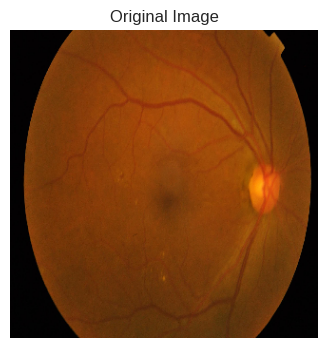

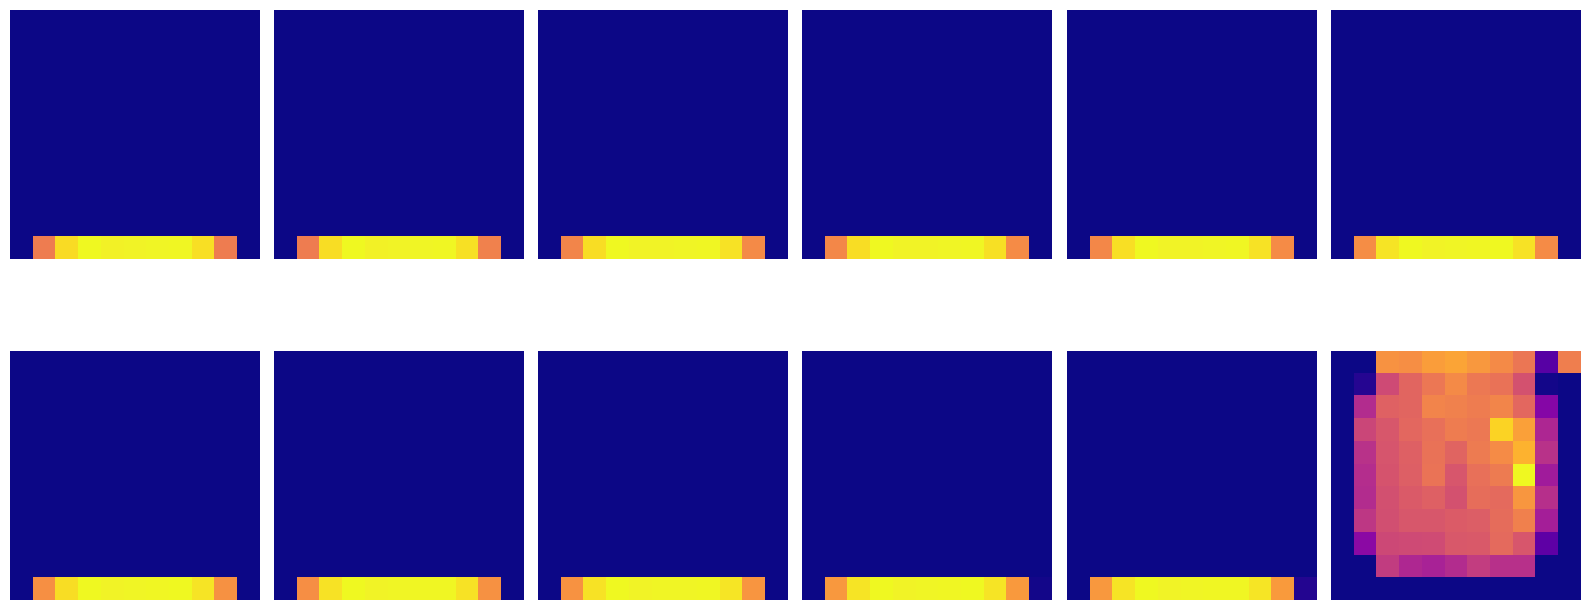

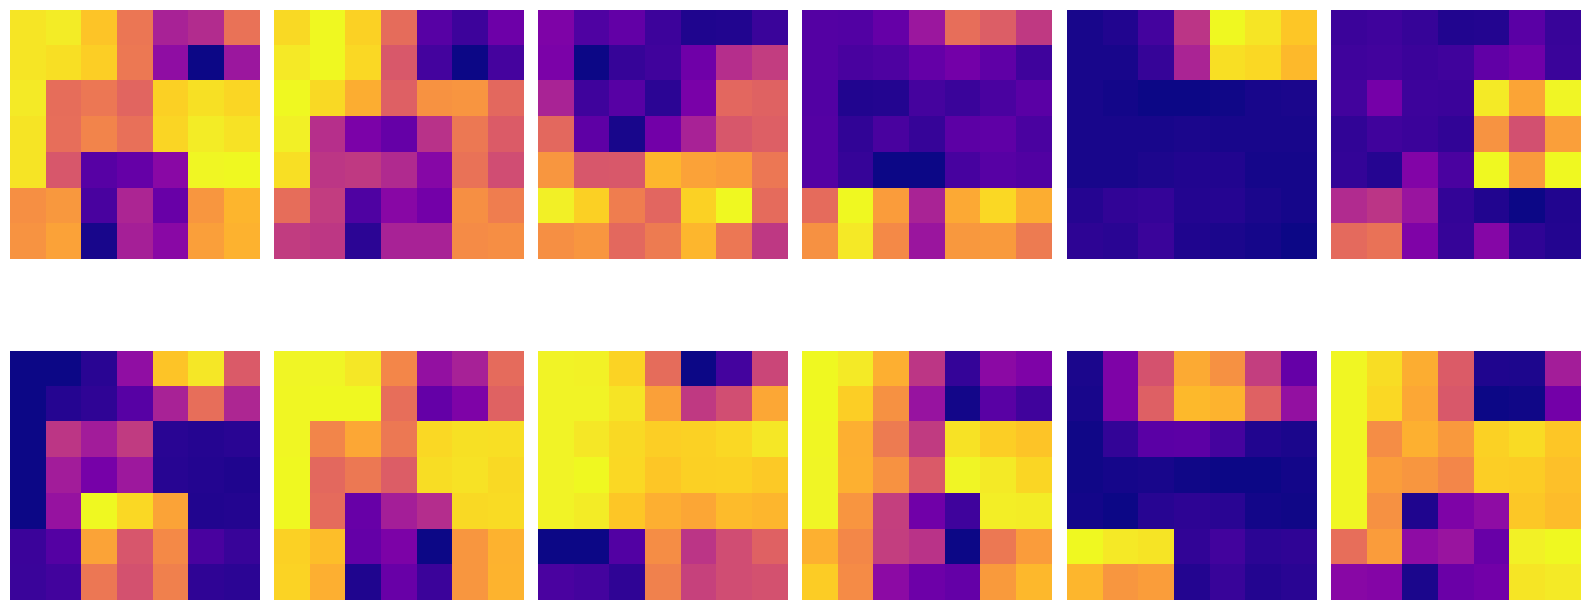

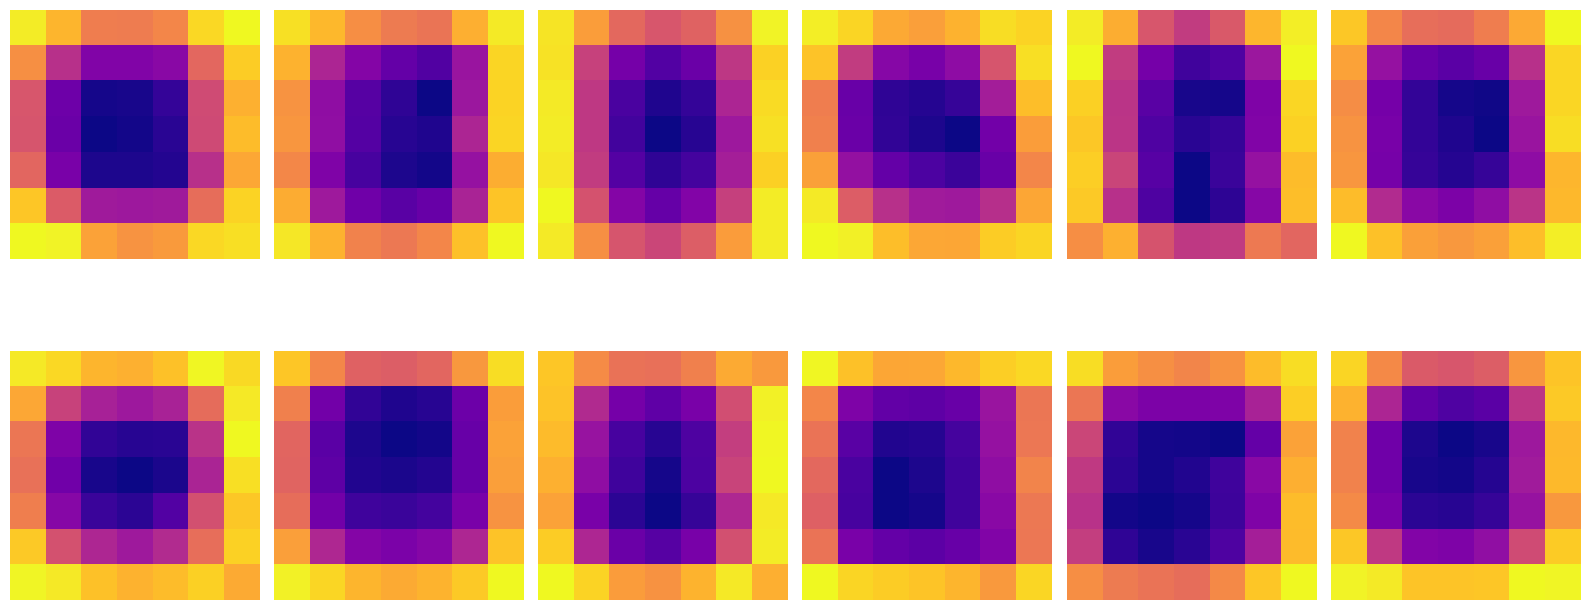

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import random

# Load models
resnet_model = tf.keras.models.load_model('/kaggle/working/resnet50_kaggle_model.h5', compile=False)
densenet_model = tf.keras.models.load_model('/kaggle/working/densenet201_kaggle_model.h5', compile=False)
efficientnet_model = tf.keras.models.load_model('/kaggle/working/efficientnetb0_kaggle_model.h5', compile=False)

# Sample random image
img_dir = '/kaggle/input/aptos2019-blindness-detection/train_images'
img_path = random.choice(os.listdir(img_dir))
sample_img_path = os.path.join(img_dir, img_path)

# Load and preprocess image for each model
def load_and_preprocess(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0), img

img_resnet, orig_img = load_and_preprocess(sample_img_path, (324, 324))
img_densenet, _ = load_and_preprocess(sample_img_path, (224, 224))
img_efficientnet, _ = load_and_preprocess(sample_img_path, (224, 224))

# Get correct layer names
resnet_conv_layer = [layer.name for layer in resnet_model.layers if 'conv' in layer.name][-1]
densenet_conv_layer = [layer.name for layer in densenet_model.layers if 'conv' in layer.name][-1]
efficientnet_conv_layer = [layer.name for layer in efficientnet_model.layers if 'conv' in layer.name][-1]

# Create feature extractors
resnet_feat_model = tf.keras.Model(inputs=resnet_model.input,
                                   outputs=resnet_model.get_layer(resnet_conv_layer).output)

densenet_feat_model = tf.keras.Model(inputs=densenet_model.input,
                                     outputs=densenet_model.get_layer(densenet_conv_layer).output)

efficientnet_feat_model = tf.keras.Model(inputs=efficientnet_model.input,
                                         outputs=efficientnet_model.get_layer(efficientnet_conv_layer).output)

# Extract feature maps
resnet_feature_map = resnet_feat_model.predict(img_resnet)
densenet_feature_map = densenet_feat_model.predict(img_densenet)
efficientnet_feature_map = efficientnet_feat_model.predict(img_efficientnet)

# Plot feature map function
def plot_feature_map(feature_map, n_channels=12, cmap='plasma'):
    if len(feature_map.shape) != 4:
        print("Not a feature map with spatial dimensions")
        return

    feature_map = feature_map[0]  # remove batch dimension
    h, w, c = feature_map.shape

    # Normalize globally
    feature_map_reshaped = feature_map.reshape(-1, c)
    scaler = MinMaxScaler()
    feature_map_scaled = scaler.fit_transform(feature_map_reshaped).reshape(h, w, c)

    # Select top activated channels
    variances = np.var(feature_map_scaled.reshape(-1, c), axis=0)
    top_indices = np.argsort(variances)[-n_channels:]

    cols = 6
    rows = int(np.ceil(n_channels / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
    axs = axs.flatten()

    for i, idx in enumerate(top_indices):
        axs[i].imshow(feature_map_scaled[:, :, idx], cmap=cmap)
        axs[i].axis('off')

    for i in range(len(top_indices), len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Show original image
plt.figure(figsize=(4, 4))
plt.imshow(orig_img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Plot updated feature maps
plot_feature_map(resnet_feature_map)
plot_feature_map(densenet_feature_map)
plot_feature_map(efficientnet_feature_map)


In [4]:
!mkdir -p /kaggle/working/contrast_enhanced_images
!mkdir -p /kaggle/working/contrast_enhanced_test_images


In [2]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Define parameters
HEIGHT = 324
WIDTH = 324
BATCH_SIZE = 32
EPOCHS = 10
STEPS_PER_EPOCH = 92

# Paths to Kaggle input
BASE_PATH = '/kaggle/input/aptos2019-blindness-detection'
train_csv_path = os.path.join(BASE_PATH, 'train.csv')
test_csv_path = os.path.join(BASE_PATH, 'test.csv')
train_image_dir = os.path.join(BASE_PATH, 'train_images')
test_image_dir = os.path.join(BASE_PATH, 'test_images')

# Load CSVs
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
train_df['filename'] = train_df['id_code'] + '.png'
test_df['filename'] = test_df['id_code'] + '.png'
train_df['diagnosis'] = train_df['diagnosis'].astype(str)

# Split data
train_split_df, val_split_df = train_test_split(train_df, test_size=0.2, stratify=train_df['diagnosis'], random_state=42)

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_split_df,
    directory=train_image_dir,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_split_df,
    directory=train_image_dir,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_image_dir,
    x_col="filename",
    target_size=(HEIGHT, WIDTH),
    batch_size=1,
    shuffle=False,
    class_mode=None
)

# Build ResNet50 model
def build_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = True
    return model

# Custom F1 Score
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Metrics
metrics = [
    tf.keras.metrics.AUC(name='AUC'),
    tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),
    tf.keras.metrics.TruePositives(name='TruePositives'),
    tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
    tf.keras.metrics.FalsePositives(name='FalsePositives'),
    tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
    F1Score(name='F1Score')
]

# Compile model
num_classes = len(train_generator.class_indices)
model = build_model(num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=metrics)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=callbacks
)

# Save model and metrics
model.save("resnet50_kaggle_model.h5")
pd.DataFrame(history.history).to_csv("resnet50_training_metrics.csv", index=False)


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.
Found 1928 validated image filenames.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - AUC: 0.8559 - Accuracy: 0.6395 - F1Score: 0.5668 - FalseNegatives: 755.3763 - FalsePositives: 201.0538 - Precision: 0.7473 - Recall: 0.4575 - TrueNegatives: 5771.6343 - TruePositives: 737.7957 - loss: 1.3092 - val_AUC: 0.4852 - val_Accuracy: 0.1010 - val_F1Score: 0.0000e+00 - val_FalseNegatives: 733.0000 - val_FalsePositives: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_TrueNegatives: 2932.0000 - val_TruePositives: 0.0000e+00 - val_loss: 1.8167 - learning_rate: 0.0010
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


92/92 ━━━━━━━━━━━━━━━━━━━━ 70s 759ms/step - AUC: 0.0000e+00 - Accuracy: 0.0000e+00 - F1Score: 0.0000e+00 - FalseNegatives: 0.0000e+00 - FalsePositives: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - TrueNegatives: 0.0000e+00 - TruePositives: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.4852 - val_Accuracy: 0.1010 - val_F1Score: 0.0000e+00 - val_FalseNegatives: 733.0000 - val_FalsePositives: 0.0000e+00 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_TrueNegatives: 2932.0000 - val_TruePositives: 0.0000e+00 - val_loss: 1.8167 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - AUC: 0.9359 - Accuracy: 0.7556 - F1Score: 0.7335 - FalseNegatives: 513.7419 - FalsePositives: 206.7312 - Precision: 0.8238 - Recall: 0.6613 - TrueNegatives: 5778.2148 - TruePositives: 982.4946 - loss: 0.7164 - val_AUC: 0.6363 - val_Accuracy: 0.2729 - val_F1Score: 0.0000e+00 - val_FalseNegatives: 733.0000 - val_FalsePositives: 0.0000e+00 - val_Precision: 0.0000e+00 - val_R

In [3]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Define parameters
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 10
STEPS_PER_EPOCH = 92

# Kaggle input directory
BASE_PATH = '/kaggle/input/aptos2019-blindness-detection'
train_csv_path = os.path.join(BASE_PATH, 'train.csv')
test_csv_path = os.path.join(BASE_PATH, 'test.csv')
train_image_dir = os.path.join(BASE_PATH, 'train_images')
test_image_dir = os.path.join(BASE_PATH, 'test_images')

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Add 'filename' column
train_df['filename'] = train_df['id_code'] + '.png'
test_df['filename'] = test_df['id_code'] + '.png'
train_df['diagnosis'] = train_df['diagnosis'].astype(str)

# Split train into train and validation sets
train_split_df, val_split_df = train_test_split(train_df, test_size=0.2, stratify=train_df['diagnosis'], random_state=42)

# ImageDataGenerator setup
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train and validation generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_split_df,
    directory=train_image_dir,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_split_df,
    directory=train_image_dir,
    x_col="filename",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_image_dir,
    x_col="filename",
    target_size=(HEIGHT, WIDTH),
    batch_size=1,
    shuffle=False,
    class_mode=None
)

# Build the DenseNet201 model
def build_model(num_classes):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = True

    return model

# Custom F1 Score
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Metrics
metrics = [
    tf.keras.metrics.AUC(name='AUC'),
    tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),
    tf.keras.metrics.TruePositives(name='TruePositives'),
    tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
    tf.keras.metrics.FalsePositives(name='FalsePositives'),
    tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
    F1Score(name='F1Score')
]

# Compile model
num_classes = len(train_generator.class_indices)
model = build_model(num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=metrics)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=callbacks
)

# Save the model and metrics in Kaggle output directory
model.save("densenet201_kaggle_model.h5")

metrics_df = pd.DataFrame(history.history)
metrics_df.to_csv("densenet201_training_metrics.csv", index=False)


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.
Found 1928 validated image filenames.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 928s 6s/step - AUC: 0.8731 - Accuracy: 0.6507 - F1Score: 0.6359 - FalseNegatives: 623.7312 - FalsePositives: 250.4194 - Precision: 0.7400 - Recall: 0.5580 - TrueNegatives: 5733.8818 - TruePositives: 872.3441 - loss: 1.1505 - val_AUC: 0.8157 - val_Accuracy: 0.6467 - val_F1Score: 0.6457 - val_FalseNegatives: 260.0000 - val_FalsePositives: 259.0000 - val_Precision: 0.6462 - val_Recall: 0.6453 - val_TrueNegatives: 2673.0000 - val_TruePositives: 473.0000 - val_loss: 7.9734 - learning_rate: 0.0010
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 752ms/step - AUC: 0.0000e+00 - Accuracy: 0.0000e+00 - F1Score: 0.0000e+00 - FalseNegatives: 0.0000e+00 - FalsePositives: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - TrueNegatives: 0.0000e+00 - TruePositives: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.8157 - val_Accuracy: 0.6467 - val_F1Score: 0.6457 - val_FalseNegatives: 260.0000 - val_FalsePositives: 259.0000 - val_Precision: 0.6462 - val_Recall: 0.6453 - val_TrueNegatives: 2673.0000 - val_TruePositives: 473.0000 - val_loss: 7.9734 - learning_rate: 0.0010
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - AUC: 0.9477 - Accuracy: 0.7605 - F1Score: 0.7411 - FalseNegatives: 476.8065 - FalsePositives: 225.4624 - Precision: 0.8205 - Recall: 0.6759 - TrueNegatives: 5786.5806 - TruePositives: 1026.2043 - loss: 0.6427 - val_AUC: 0.8961 - val_Accuracy: 0.6835 - val_F1Score: 0.6818 - val_FalseNegatives: 237.0000 - val_FalsePositives: 226.0000 - val_Precision: 0.6870 - val_Recall: 0.6767 - val_TrueN

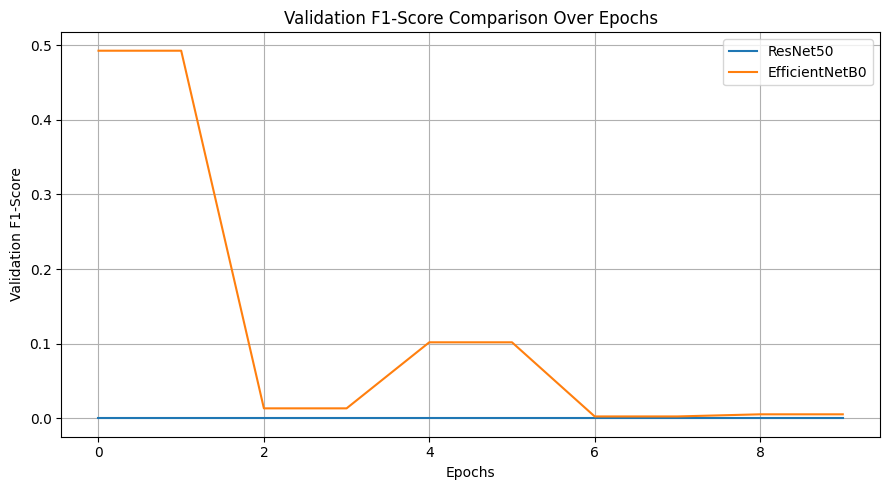

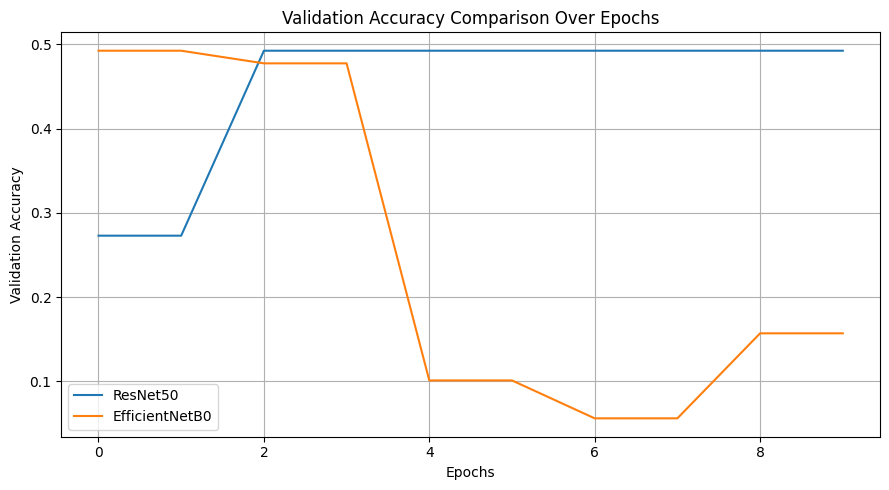

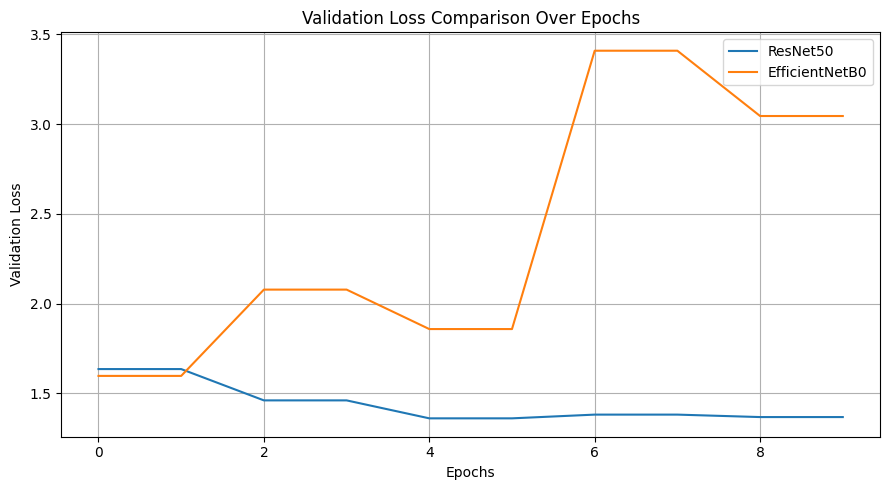

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs (update filenames if different)
resnet = pd.read_csv('resnet50_training_metrics.csv')
densenet = pd.read_csv('densenet201_training_metrics.csv')
efficientnet = pd.read_csv('efficientnetb0_training_metrics.csv')

def compare_metric(metric_name, display_name):
    plt.figure(figsize=(9, 5))
    plt.plot(resnet[metric_name], label='ResNet50')
    plt.plot(densenet[metric_name], label='DenseNet201')
    plt.plot(efficientnet[metric_name], label='EfficientNetB0')
    plt.title(f'{display_name} Comparison Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(display_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot comparisons
compare_metric('val_F1Score', 'Validation F1-Score')
compare_metric('val_Accuracy', 'Validation Accuracy')
compare_metric('val_loss', 'Validation Loss')


CLAHE & Filter Adaptive 

In [12]:
import cv2
import os

def preprocess_image(image):
    """
    Preprocesses the image using CLAHE (Contrast Limited Adaptive Histogram Equalization).
    Converts image to grayscale, applies CLAHE, and returns the enhanced image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image

def process_and_save_images(input_folder, output_folder):
    """
    Processes all .png or .jpg images in the input folder and saves the preprocessed
    grayscale CLAHE images to the output folder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in os.listdir(input_folder):
        if file.endswith(".png") or file.endswith(".jpg"):
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)

            image = cv2.imread(input_path)
            if image is None:
                print(f"Skipping {file} - cannot read image.")
                continue

            processed = preprocess_image(image)
            cv2.imwrite(output_path, processed)
            print(f"Saved: {output_path}")

# Define paths (update folder name if different)
input_folder = '/kaggle/input/aptos2019-blindness-detection/train_images'
output_folder = '/kaggle/working/contrast_enhanced_images'

# Run preprocessing
process_and_save_images(input_folder, output_folder)


Saved: /kaggle/working/contrast_enhanced_images/ef476be214d4.png
Saved: /kaggle/working/contrast_enhanced_images/6dcde47060f9.png
Saved: /kaggle/working/contrast_enhanced_images/ec363f48867b.png
Saved: /kaggle/working/contrast_enhanced_images/17f6c7072f61.png
Saved: /kaggle/working/contrast_enhanced_images/b49b2fac2514.png
Saved: /kaggle/working/contrast_enhanced_images/af6166d57f13.png
Saved: /kaggle/working/contrast_enhanced_images/8d13c46e7d75.png
Saved: /kaggle/working/contrast_enhanced_images/c3b15bf9b4bc.png
Saved: /kaggle/working/contrast_enhanced_images/be68322c7223.png
Saved: /kaggle/working/contrast_enhanced_images/88e4399d207c.png
Saved: /kaggle/working/contrast_enhanced_images/0243404e8a00.png
Saved: /kaggle/working/contrast_enhanced_images/77ab222bf85c.png
Saved: /kaggle/working/contrast_enhanced_images/4a05f81b3aba.png
Saved: /kaggle/working/contrast_enhanced_images/61d9c88a3a4b.png
Saved: /kaggle/working/contrast_enhanced_images/8448af27ba07.png
Saved: /kaggle/working/co

In [13]:
import cv2
import os

def preprocess_image(image):
    """
    Applies CLAHE for contrast enhancement on a grayscale image.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image

def process_and_save_images(input_folder, output_folder):
    """
    Processes and saves all .png or .jpg images from input_folder to output_folder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in os.listdir(input_folder):
        if file.endswith(".png") or file.endswith(".jpg"):
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)

            image = cv2.imread(input_path)
            if image is None:
                print(f"Skipping {file} — could not load.")
                continue

            processed = preprocess_image(image)
            cv2.imwrite(output_path, processed)
            print(f"Saved: {output_path}")

# Paths for Kaggle
input_folder = '/kaggle/input/aptos2019-blindness-detection/test_images'
output_folder = '/kaggle/working/contrast_enhanced_test_images'

# Run CLAHE preprocessing
process_and_save_images(input_folder, output_folder)


Saved: /kaggle/working/contrast_enhanced_test_images/755615db51d3.png
Saved: /kaggle/working/contrast_enhanced_test_images/d8f6c660bf2d.png
Saved: /kaggle/working/contrast_enhanced_test_images/619ce2c77917.png
Saved: /kaggle/working/contrast_enhanced_test_images/94a6e4f3c625.png
Saved: /kaggle/working/contrast_enhanced_test_images/ee506d853270.png
Saved: /kaggle/working/contrast_enhanced_test_images/acd52452b9a2.png
Saved: /kaggle/working/contrast_enhanced_test_images/b0b0d564e6c6.png
Saved: /kaggle/working/contrast_enhanced_test_images/228769e96741.png
Saved: /kaggle/working/contrast_enhanced_test_images/a87e705d63ee.png
Saved: /kaggle/working/contrast_enhanced_test_images/8c49d9de02d6.png
Saved: /kaggle/working/contrast_enhanced_test_images/69d21c5c7dce.png
Saved: /kaggle/working/contrast_enhanced_test_images/2f042d9c1376.png
Saved: /kaggle/working/contrast_enhanced_test_images/c97946322879.png
Saved: /kaggle/working/contrast_enhanced_test_images/6dd2dbd802ea.png
Saved: /kaggle/worki

In [19]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Parameters
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 16
EPOCHS = 50
CHANNELS = 3

# Dataset paths (adjust if needed)
TRAIN_CSV = '/kaggle/input/aptos2019-blindness-detection/train.csv'
TEST_CSV = '/kaggle/input/aptos2019-blindness-detection/test.csv'
TRAIN_IMG_DIR = '/kaggle/working/contrast_enhanced_images'
TEST_IMG_DIR = '/kaggle/working/contrast_enhanced_test_images'

# Load data
df_train = pd.read_csv(TRAIN_CSV)
df_test = pd.read_csv(TEST_CSV)

df_train['id_code'] = df_train['id_code'].astype(str) + '.png'
df_test['id_code'] = df_test['id_code'].astype(str) + '.png'
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
N_CLASSES = df_train['diagnosis'].nunique()

# Split data
df_train_split, df_val_split = train_test_split(df_train, test_size=0.2, stratify=df_train['diagnosis'], random_state=42)

# Image generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_split,
    directory=TRAIN_IMG_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val_split,
    directory=TRAIN_IMG_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=TEST_IMG_DIR,
    x_col="id_code",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Build ResNet152V2 model
def build_model():
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNELS))
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
            tf.keras.metrics.Precision(name='Precision'),
            tf.keras.metrics.Recall(name='Recall'),
            tf.keras.metrics.TruePositives(name='TruePositives'),
            tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
            tf.keras.metrics.FalsePositives(name='FalsePositives'),
            tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
            F1Score(name='F1Score')
        ]
    )
    return model

# Compile and train model
model = build_model()

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    epochs=EPOCHS,
    callbacks=[reduce_lr]
)

# Save model and metrics
model.save("resnet152v2_contrast_enhanced_kaggle.h5")
pd.DataFrame(history.history).to_csv("resnet152v2_cei_metrics.csv", index=False)


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.
Found 1928 validated image filenames.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - Accuracy: 0.3207 - F1Score: 0.2004 - FalseNegatives: 1204.7729 - FalsePositives: 193.4811 - Precision: 0.4261 - Recall: 0.1322 - TrueNegatives: 5708.5513 - TruePositives: 270.7351 - loss: 1.7423 - val_Accuracy: 0.6303 - val_F1Score: 0.5740 - val_FalseNegatives: 411.0000 - val_FalsePositives: 67.0000 - val_Precision: 0.8278 - val_Recall: 0.4393 - val_TrueNegatives: 2865.0000 - val_TruePositives: 322.0000 - val_loss: 1.1041 - learning_rate: 1.0000e-05
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - Accuracy: 0.0000e+00 - F1Score: 0.0000e+00 - FalseNegatives: 0.0000e+00 - FalsePositives: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - TrueNegatives: 0.0000e+00 - TruePositives: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: Accuracy,F1Score,FalseNegatives,FalsePositives,Precision,Recall,TrueNegatives,TruePositives,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 180s 951ms/step - Accuracy: 0.6735 - F1Score: 0.6472 - FalseNegatives: 680.5946 - FalsePositives: 192.2486 - Precision: 0.8080 - Recall: 0.5400 - TrueNegatives: 5752.5947 - TruePositives: 805.6162 - loss: 1.0016 - val_Accuracy: 0.6739 - val_F1Score: 0.6199 - val_FalseNegatives: 371.0000 - val_FalsePositives: 73.0000 - val_Precision: 0.8322 - val_Recall: 0.4939 - val_TrueNegatives: 2859.0000 - val_TruePositives: 362.0000 - val_loss: 1.0111 - learning_rate: 1.0000e-05
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - Accuracy: 0.0000e+00 - F1Score: 0.0000e+00 - FalseNegatives: 0.0000e+00 - FalsePositives: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - TrueNegatives: 0.0000e+00 - TruePositives: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 177s 933ms/step - Accuracy: 0.7003 - F1Score: 0.6784 - FalseNegatives: 610.8325 - FalsePositives: 198.1730 - Precision: 0.8087 - Recall: 0.5843 - TrueNegat

ValueError: All arrays must be of the same length

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Parameters
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 16
EPOCHS = 5
CHANNELS = 3

# Dataset paths (adjust if needed)
TRAIN_CSV = '/kaggle/input/aptos2019-blindness-detection/train.csv'
TEST_CSV = '/kaggle/input/aptos2019-blindness-detection/test.csv'
TRAIN_IMG_DIR = '/kaggle/working/contrast_enhanced_images'
TEST_IMG_DIR = '/kaggle/working/contrast_enhanced_test_images'

# Load data
df_train = pd.read_csv(TRAIN_CSV)
df_test = pd.read_csv(TEST_CSV)

df_train['id_code'] = df_train['id_code'].astype(str) + '.png'
df_test['id_code'] = df_test['id_code'].astype(str) + '.png'
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
N_CLASSES = df_train['diagnosis'].nunique()

# Split data
df_train_split, df_val_split = train_test_split(df_train, test_size=0.2, stratify=df_train['diagnosis'], random_state=42)

# Image generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_split,
    directory=TRAIN_IMG_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val_split,
    directory=TRAIN_IMG_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=TEST_IMG_DIR,
    x_col="id_code",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

# Custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# Build ResNet152V2 model
def build_model():
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNELS))
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
            tf.keras.metrics.Precision(name='Precision'),
            tf.keras.metrics.Recall(name='Recall'),
            tf.keras.metrics.TruePositives(name='TruePositives'),
            tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
            tf.keras.metrics.FalsePositives(name='FalsePositives'),
            tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
            F1Score(name='F1Score')
        ]
    )
    return model

# Metric post-processing function (safe for uneven histories)
def process_history_strict(history):
    history_dict = history.history
    metric_lengths = {k: len(v) for k, v in history_dict.items()}
    print(" Metric lengths:", metric_lengths)

    min_len = min(metric_lengths.values())
    print(f" Trimming all metrics to the minimum common length: {min_len}")

    cleaned_history = {k: v[:min_len] for k, v in history_dict.items()}

    metrics_df = pd.DataFrame(cleaned_history)
    metrics_df['epoch'] = range(1, len(metrics_df) + 1)

    return metrics_df

# Train model
model = build_model()

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    epochs=EPOCHS,
    callbacks=[reduce_lr]
)

# Save model
model.save("resnet152v2_contrast_enhanced_kaggle.h5")

# Process and save metrics safely
metrics_df = process_history_strict(history)
metrics_df.to_csv("resnet152v2_cei_metrics.csv", index=False)




In [29]:
import pandas as pd

def process_history_strict(history):
    history_dict = history.history

    # Step 1: Log the lengths of each metric
    metric_lengths = {k: len(v) for k, v in history_dict.items()}
    print("📊 Metric lengths:", metric_lengths)

    # Step 2: Find the minimum length across all metric lists
    min_len = min(metric_lengths.values())
    print(f"✅ Trimming all metrics to the minimum common length: {min_len}")

    # Step 3: Trim all lists to the same length
    cleaned_history = {k: v[:min_len] for k, v in history_dict.items()}

    # Step 4: Convert to DataFrame
    metrics_df = pd.DataFrame(cleaned_history)
    metrics_df['epoch'] = range(1, len(metrics_df) + 1)

    return metrics_df

# ✅ Use after training
metrics_df = process_history_strict(history)

# ✅ Optional: Save to CSV
metrics_df.to_csv('training_metrics.csv', index=False)

# ✅ Preview
print(metrics_df.head())


📊 Metric lengths: {'AUC': 5, 'Accuracy': 5, 'FalseNegatives': 5, 'FalsePositives': 5, 'Precision': 5, 'Recall': 5, 'TrueNegatives': 5, 'TruePositives': 5, 'f1_score': 5, 'loss': 5, 'sensitivity': 5, 'specificity': 5, 'val_AUC': 3, 'val_Accuracy': 3, 'val_FalseNegatives': 3, 'val_FalsePositives': 3, 'val_Precision': 3, 'val_Recall': 3, 'val_TrueNegatives': 3, 'val_TruePositives': 3, 'val_f1_score': 3, 'val_loss': 3, 'val_sensitivity': 3, 'val_specificity': 3, 'learning_rate': 5}
✅ Trimming all metrics to the minimum common length: 3
        AUC  Accuracy  FalseNegatives  FalsePositives  Precision    Recall  \
0  0.807352  0.533971          1966.0           287.0   0.770400  0.328781   
1  0.000000  0.000000             0.0             0.0   0.000000  0.000000   
2  0.894244  0.670195          1389.0           371.0   0.805861  0.525777   

   TrueNegatives  TruePositives  f1_score      loss  ...  val_Precision  \
0        11429.0          963.0  0.460876  1.291682  ...       0.819672   

In [18]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

# Parameters
HEIGHT = 224
WIDTH = 224
CHANNELS = 3
BATCH_SIZE = 16
EPOCHS = 30
LEARNING_RATE = 1e-4

# Dataset paths (based on Kaggle input/output structure)
TRAIN_CSV = '/kaggle/input/aptos2019-blindness-detection/train.csv'
TEST_CSV = '/kaggle/input/aptos2019-blindness-detection/test.csv'
TRAIN_IMG_DIR = '/kaggle/working/contrast_enhanced_images'
TEST_IMG_DIR = '/kaggle/working/contrast_enhanced_test_images'

# Load CSVs
df_train = pd.read_csv(TRAIN_CSV)
df_test = pd.read_csv(TEST_CSV)

df_train['id_code'] = df_train['id_code'].astype(str) + '.png'
df_test['id_code'] = df_test['id_code'].astype(str) + '.png'
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
N_CLASSES = df_train['diagnosis'].nunique()

# Train-validation split
df_train_split, df_val_split = train_test_split(df_train, test_size=0.2, stratify=df_train['diagnosis'], random_state=42)

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_split,
    directory=TRAIN_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val_split,
    directory=TRAIN_DIR,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=TEST_DIR,
    x_col="id_code",
    target_size=(HEIGHT, WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Custom F1 Score
def f1_score(y_true, y_pred):
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    p = precision.result()
    r = recall.result()
    return 2 * ((p * r) / (p + r + K.epsilon()))

# Build DenseNet201 Model
def build_model(num_classes):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNELS))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = True

    return model

# Compile model
model = build_model(N_CLASSES)
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.TruePositives(name='TruePositives'),
        tf.keras.metrics.TrueNegatives(name='TrueNegatives'),
        tf.keras.metrics.FalsePositives(name='FalsePositives'),
        tf.keras.metrics.FalseNegatives(name='FalseNegatives'),
        f1_score
    ]
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[reduce_lr]
)

# Save model and metrics
model.save("_contrast_enhanced_kaggle.h5")
pd.DataFrame(history.history).to_csv("/kaggle/working/densenet201(CEI)_metrics.csv", index=False)


NameError: name 'df_train_train' is not defined